# NOTA
Realizando un análisis a los datos se determinó que un archivo más apropiado para realizar los ejercicios propuestos es el de covid_19_clean_complete.csv, pues de otro modo muchos de los problemas no harán ninguna transformación al dataframe. Por ejemplo, no están segregadas por fecha, y ya están agrupadas por país, por lo que no es necesario hacer ningún cambio al momento de agrupar.

In [13]:
#Importamos las librerías a utilizar
import pandas as pd
import numpy as np

## Inciso 1:
A continuación se leen y cargan los datos más actuales de COVID-19 por país, usando la librería pandas. 

In [2]:
#Importamos los datos que vamos a utilizar
datos = pd.read_csv('datos_covid/covid_19_clean_complete.csv')

## Inciso 2
Se imprime la información del dataframe para determinar si es necesario hacer cambio de nombres a las columnas o al tipo de datos. Además, se imprime una fila de datos para analizarlos y escoger los mejores nombres para dichas columnas.

In [3]:
print(datos.info())
datos.loc[datos['Country/Region'] == 'Guatemala']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.0+ MB
None


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
121,NaN,Guatemala,15.7835,-90.2308,2020-01-22,0,0,0,0,Americas
382,NaN,Guatemala,15.7835,-90.2308,2020-01-23,0,0,0,0,Americas
643,NaN,Guatemala,15.7835,-90.2308,2020-01-24,0,0,0,0,Americas
904,NaN,Guatemala,15.7835,-90.2308,2020-01-25,0,0,0,0,Americas
1165,NaN,Guatemala,15.7835,-90.2308,2020-01-26,0,0,0,0,Americas
...,...,...,...,...,...,...,...,...,...,...
47884,NaN,Guatemala,15.7835,-90.2308,2020-07-23,42192,1632,28856,11704,Americas
48145,NaN,Guatemala,15.7835,-90.2308,2020-07-24,43283,1669,30150,11464,Americas
48406,NaN,Guatemala,15.7835,-90.2308,2020-07-25,44492,1699,31045,11748,Americas
48667,NaN,Guatemala,15.7835,-90.2308,2020-07-26,45053,1734,31612,11707,Americas


Tras el análisis, se determina que los nombres de las columnas son apropiados por lo que únicamente se traducirán al español.

In [4]:
datos.columns = ['Provincia/Estado', 'País/Región', 'Latitud', 'Longitud', 'Fecha', 'Confirmados', 'Muertes', 'Recuperados', 'Activos', 'Región OMS']

In [5]:
#Seleccionamos los datos que tienen alguna columna vacía para determinar el procesamiento adecuado.
datos.loc[datos.isnull().any(axis = 1)]

,Provincia/Estado,País/Región,Latitud,Longitud,Fecha,Confirmados,Muertes,Recuperados,Activos,Región OMS
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


Puesto que los datos faltantes únicamente están en provincia, para los países que no están divididos por estado, únicamente se copiará el nombre del país en dicho campo.

También podríamos haber deducido que los únicos faltantes eran en el campo de Provincia observando que en datos.info() el resto de campos tienen el total de datos como not-null.

In [6]:
#Realizamos el cambio y corroboramos que 
datos.loc[datos.isnull().any(axis = 1), 'Provincia/Estado'] = datos['País/Región']
datos.loc[datos.isnull().any(axis = 1)]

,Provincia/Estado,País/Región,Latitud,Longitud,Fecha,Confirmados,Muertes,Recuperados,Activos,Región OMS


## Inciso 3
Se deja el cálculo de medidas importantes para el final, cuando los datos ya estén procesados y podamos evaluarlos más fácilmente.

## Inciso 4
Se crea una nueva columna llamada 'Active' que es la cantidad de pacientes (casos positivos no recuperados) vivos.

(Esta columna debería ser idéntica a la columna de 'Activos')

In [7]:
datos['Active'] = datos['Confirmados'] - datos['Recuperados'] - datos['Muertes']
datos[['Provincia/Estado','Fecha','Activos','Active']]

,Provincia/Estado,Fecha,Activos,Active
0,Afghanistan,2020-01-22,0,0
1,Albania,2020-01-22,0,0
2,Algeria,2020-01-22,0,0
3,Andorra,2020-01-22,0,0
4,Angola,2020-01-22,0,0
...,...,...,...,...
49063,Sao Tome and Principe,2020-07-27,117,117
49064,Yemen,2020-07-27,375,375
49065,Comoros,2020-07-27,19,19
49066,Tajikistan,2020-07-27,1147,1147


## Inciso 5
Se agrupan por país y se muestra el total  de confirmados, muertes, recuperados y activos.
(Puesto que el país es único, el dataframe procesado debería ser el mismo, por lo que se incluye el mismo ejercicio pero agrupando por región de la OMS)

In [8]:
#Primero agrupamos por país y fecha para consolidar todas las provincias de un país en un solo dato.
agrupados_prov = datos.groupby(['País/Región','Fecha']).agg(Confirmados = ('Confirmados','sum'),\
                                            Muertes = ('Muertes', 'sum'),\
                                            Recuperados = ('Recuperados', 'sum'),\
                                            Activos = ('Activos', 'sum'))


In [9]:
#Una vez se tienen los datos a nivel país, puesto que el valor que se muestra es acumulado, únicamente debemos seleccionar la última fecha.
agrupados_prov.sort_index(inplace= True)
agrupados_pais = agrupados_prov.reset_index().drop_duplicates('País/Región', keep= 'last')
agrupados_pais.drop(columns=['Fecha'], inplace=True)
agrupados_pais

,País/Región,Confirmados,Muertes,Recuperados,Activos
187,Afghanistan,36263,1269,25198,9796
375,Albania,4880,144,2745,1991
563,Algeria,27973,1163,18837,7973
751,Andorra,907,52,803,52
939,Angola,950,41,242,667
...,...,...,...,...,...
34403,West Bank and Gaza,10621,78,3752,6791
34591,Western Sahara,10,1,8,1
34779,Yemen,1691,483,833,375
34967,Zambia,4552,140,2815,1597


## Inciso 6
Se ordenan los países por el número de casos y se muestran los 10 con mayor cantidad.

In [10]:
#Se ordenan los datos por número de confirmados y se muestran los mayores 10.
pais_ordenados = agrupados_pais.sort_values('Confirmados', ascending= False)
pais_ordenados.head(10)

,País/Región,Confirmados,Muertes,Recuperados,Activos
32711,US,4290259,148011,1325804,2816444
4511,Brazil,2442375,87618,1846641,508116
15039,India,1480073,33408,951166,495499
26131,Russia,816680,13334,602249,201097
29139,South Africa,452529,7067,274925,170537
21055,Mexico,395489,44022,303810,47657
25003,Peru,389717,18418,272547,98752
6767,Chile,347923,9187,319954,18782
33463,United Kingdom,301708,45844,1437,254427
15415,Iran,293606,15912,255144,22550


## Inciso 7
Se muestra una gráfica de líneas con los casos, muertes y recuperaciones de un país específico.

In [11]:
datos_nac = agrupados_prov.loc[agrupados_prov.index.get_level_values('País/Región') == 'China']
datos_nac.reset_index(inplace= True)

<AxesSubplot:xlabel='Fecha'>

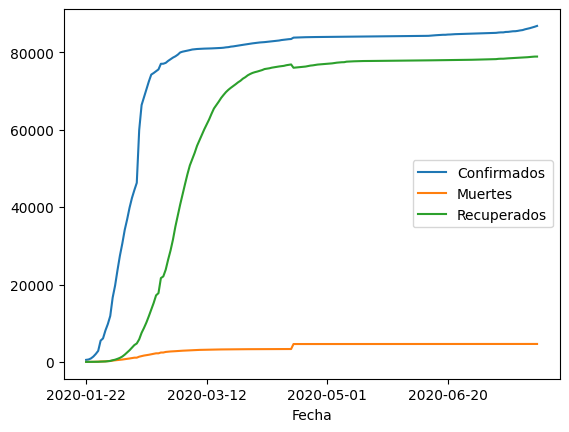

In [27]:
labels = datos_nac.plot.line(x = 'Fecha', y = ['Confirmados', 'Muertes', 'Recuperados'])
labels.locator_params(axis='x', nbins=7)
labels


## Inciso 3
Se calculan medidas descriptivas de los datos. Para esto se agregan las columnas de porcentaje de muertes y recuperados de los casos confirmados.

In [20]:
agrupados_pais['Porcentaje recuperados'] = 100*agrupados_pais['Recuperados']/agrupados_pais['Confirmados']
agrupados_pais['Porcentaje muertes'] = 100*agrupados_pais['Muertes']/agrupados_pais['Confirmados']
agrupados_pais.set_index('País/Región', inplace= True)
agrupados_pais

,Confirmados,Muertes,Recuperados,Activos,Porcentaje recuperados,Porcentaje muertes
País/Región,,,,,,
Afghanistan,36263,1269,25198,9796,69.486805,3.499435
Albania,4880,144,2745,1991,56.250000,2.950820
Algeria,27973,1163,18837,7973,67.339935,4.157581
Andorra,907,52,803,52,88.533627,5.733186
Angola,950,41,242,667,25.473684,4.315789
...,...,...,...,...,...,...
West Bank and Gaza,10621,78,3752,6791,35.326240,0.734394
Western Sahara,10,1,8,1,80.000000,10.000000
Yemen,1691,483,833,375,49.260792,28.562980


In [24]:
#Los máximos de cada una de las columnas son:
agrupados_pais.max(axis= 0)

Confirmados               4.290259e+06
Muertes                   1.480110e+05
Recuperados               1.846641e+06
Activos                   2.816444e+06
Porcentaje recuperados    1.000000e+02
Porcentaje muertes        2.856298e+01
dtype: float64

In [22]:
#Los mínimos de cada una de las columnas son:
agrupados_pais.min(axis= 0)

Confirmados               10.0
Muertes                    0.0
Recuperados                0.0
Activos                    0.0
Porcentaje recuperados     0.0
Porcentaje muertes         0.0
dtype: float64

In [23]:
#Los promedios de cada una de las columnas son:
agrupados_pais.mean(axis= 0)

Confirmados               88130.935829
Muertes                    3497.518717
Recuperados               50631.481283
Activos                   34001.935829
Porcentaje recuperados       64.820337
Porcentaje muertes            3.019317
dtype: float64

In [25]:
#Las medianas de cada una de las columnas son:
agrupados_pais.median(axis= 0)

Confirmados               5059.000000
Muertes                    108.000000
Recuperados               2815.000000
Activos                   1600.000000
Porcentaje recuperados      71.315860
Porcentaje muertes           2.151623
dtype: float64

In [26]:
#Las desviaciones estándar de cada una de las columnas son:
agrupados_pais.std(axis= 0)

Confirmados               383318.663831
Muertes                    14100.002482
Recuperados               190188.189643
Activos                   213326.173371
Porcentaje recuperados        26.287763
Porcentaje muertes             3.454389
dtype: float64